In [5]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import UnivariateSpline

from pykalman import KalmanFilter

sys.path.append('../')

from utils import process_match_stats, load_atp_data

In [2]:
df = load_atp_data(folder_path='../tennis_atp')

shape before dropping match dupes: (583792, 75)
shape after dropping match dupes: (583731, 75)


In [48]:
mdf = process_match_stats(df)

In [49]:
mdf['ace_perc'] = mdf['ace'].div(mdf['svpt'])
mdf['bp_svp'] = mdf['bpWon'].div(mdf['bpOpps'])

In [51]:
mdf.dropna(subset=['rolling_aces_perc'], inplace=True)

In [53]:
mdf.groupby()

,name,date,id,round,sets,ace,df,svpt,1stIn,1stWon,...,rolling_dfs,rolling_dfs_perc,rolling_1stRetOpps,rolling_1stRetPts,rolling_1stRet_perc,rolling_2ndRetOpps,rolling_2ndRetPts,rolling_2ndRet_perc,ace_perc,bp_svp
218,Markus Hantschk,2000-01-10,2000-301,3,2,0.0,3.0,63.0,29.0,21.0,...,10.0,0.019417,257.0,74.0,0.287938,195.0,78.0,0.400000,0.000000,0.0
232,Magnus Norman,2000-01-10,2000-301,4,2,3.0,2.0,63.0,40.0,31.0,...,17.0,0.054313,183.0,62.0,0.338798,146.0,59.0,0.404110,0.047619,0.3
235,Sjeng Schalken,2000-01-10,2000-301,5,2,2.0,1.0,48.0,24.0,13.0,...,19.0,0.065068,204.0,69.0,0.338235,165.0,82.0,0.496970,0.041667,0.0
236,Magnus Norman,2000-01-10,2000-301,5,2,7.0,2.0,55.0,31.0,25.0,...,19.0,0.050532,207.0,69.0,0.333333,176.0,70.0,0.397727,0.127273,0.5
238,Magnus Norman,2000-01-10,2000-301,6,2,4.0,1.0,59.0,38.0,26.0,...,21.0,0.048724,234.0,75.0,0.320513,204.0,84.0,0.411765,0.067797,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583724,Gonzalo Bueno,2023-02-06,2023-M-ITF-USA-04A-2023,5,2,NaN,NaN,NaN,NaN,NaN,...,8.0,0.025000,203.0,70.0,0.344828,116.0,36.0,0.310345,NaN,NaN
583725,Ignacio Monzon,2023-02-06,2023-M-ITF-USA-04A-2023,5,3,NaN,NaN,NaN,NaN,NaN,...,22.0,0.054187,244.0,73.0,0.299180,153.0,63.0,0.411765,NaN,NaN
583728,Gonzalo Bueno,2023-02-06,2023-M-ITF-USA-04A-2023,6,2,NaN,NaN,NaN,NaN,NaN,...,8.0,0.032258,156.0,57.0,0.365385,103.0,31.0,0.300971,NaN,NaN
583728,Ignacio Monzon,2023-02-06,2023-M-ITF-USA-04A-2023,6,2,NaN,NaN,NaN,NaN,NaN,...,22.0,0.054187,244.0,73.0,0.299180,153.0,63.0,0.411765,NaN,NaN


In [38]:
st, sp, test = train_kalman(name='Andre Agassi')

[[6.46590129e-07]] [[8.55339406e-06]]


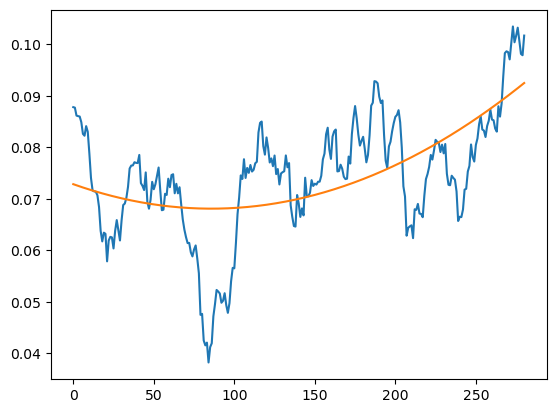

In [39]:
fig, ax = plt.subplots()

plt.plot(st)
plt.plot(range(len(st)), sp(range(len(st))))

plt.show()

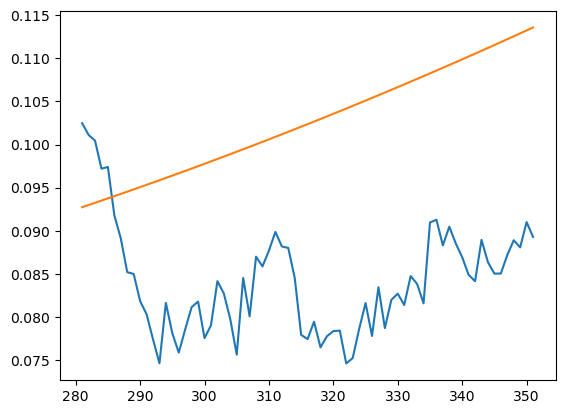

In [40]:
fig, ax = plt.subplots()

plt.plot(test)
plt.plot(test.index, sp(test.index))

plt.show()